In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   #for plotting charts
from pylab import rcParams
import numpy as np
import math as mth
from scipy import stats
import os
import scipy as py
%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.size

10692

**After going through the features of the dataset, we find that cabin and ticket doesnt hold much value of significance for carrying out our further analysis. Hence we will drop those columns from our dataset**

In [6]:
train.drop(['Ticket','Cabin'], axis=1, inplace = True) 
test.drop(['Ticket','Cabin'], axis=1, inplace = True) 

### Check for the missing values in train dataset 

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

**Considering the age feature that has around 263 missing values out of the total 15,708 ; we can handle it in 2 ways :**
    
   1) Drop those records from the dataset
   
   2) Calculating the mean value and putting it in that place 

#### In this dataset, lets proceed by dropping those records instead of replacing them with the mean since it is very less number of missing values

In [9]:
train = train.dropna()
test = test.dropna()

#### Lets check the datatype info of each column

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 9 columns):
PassengerId    331 non-null int64
Pclass         331 non-null int64
Name           331 non-null object
Sex            331 non-null object
Age            331 non-null float64
SibSp          331 non-null int64
Parch          331 non-null int64
Fare           331 non-null float64
Embarked       331 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 25.9+ KB


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Looking at the name column, we can see that there are titles given to the passenger names which after close observation can be seen related to the Age group given and also the survival status. Hence we extract these titles from the Name feature

In [13]:
def format_name(train,test):
    train['Title'] = train.Name.apply(lambda x: x.split(' ')[1])
    test['Title'] = test.Name.apply(lambda x: x.split(' ')[1])    
    return train,test

train,test = format_name(train,test)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs.


Since there are multiple titles available, we shorten it by categorizing it in simpler terms:  

In [15]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Cruyssen,'], dtype=object)

In [16]:
test.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Carlo,', 'Khalil,', 'Master.', 'y',
       'Palmquist,', 'Col.', 'Planke,', 'Rev.', 'Billiard,',
       'Messemaeker,', 'Dr.', 'Brito,'], dtype=object)

In [17]:
train['Title'].replace(to_replace=['Planke,', 'Don.', 'Rev.','Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y','Steen,', 'Carlo,','Impe,', 'Major.', 'Gordon,','Messemaeker,','Col.', 'Capt.', 'Velde,', 'the','Shawah,', 'Jonkheer.', 'Cruyssen,'],value='Rare',inplace=True)    
train['Title'].replace('Mlle.', 'Miss', inplace = True)
train['Title'].replace('Ms.', 'Miss', inplace = True)
train['Title'].replace('Mme.', 'Mrs', inplace = True)

test['Title'].replace(to_replace=['Planke,', 'Don.', 'Rev.','Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y','Steen,', 'Carlo,','Impe,', 'Major.', 'Gordon,','Messemaeker,','Col.', 'Capt.', 'Velde,', 'the','Shawah,', 'Jonkheer.', 'Cruyssen,','Khalil,','Palmquist,', 'Brito,'],value='Rare',inplace=True)    
test['Title'].replace('Mlle.', 'Miss', inplace = True)
test['Title'].replace('Ms.', 'Miss', inplace = True)
test['Title'].replace('Mme.', 'Mrs', inplace = True)

##### Before proceeding....we will try to answer few questions which will help us for performing basic analysis on the dataset:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

#### Lets start with the first question:
  1)  Who were the passengers on titanic?

-> Since here we are using a single column for analysis, we will do something called as univariate analysis. It is represented by class countplot in Seaborn library

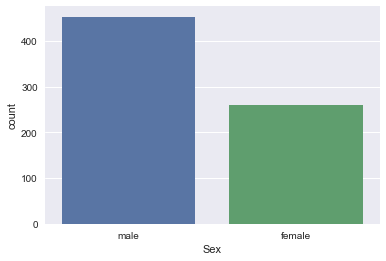

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Sex", data=train)

** Now let's seperate the genders by classes using the 'hue' arguement **

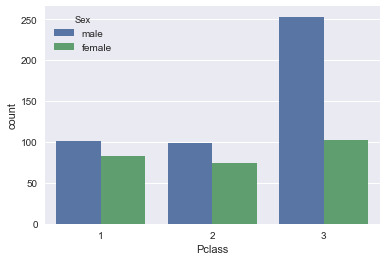

In [19]:
sns.countplot('Pclass',data=train,hue='Sex')

From above we can observe that most of the males were in Pclass 3 whereas the number of females is closely distributed in all pclasses.

#### Lets consider the different age people on the ship:

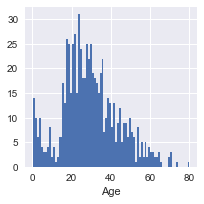

In [20]:
g = sns.FacetGrid(train)
g.map(plt.hist, 'Age', bins=80)

##### In Titanic, the preference was given to females and children for survival. Since we dont have a record stating "Child", we will create one. 
For this we will create a new column which is similar to Sex but it will show the child record as well

In [21]:
# First let's make a function to sort through the sex 
def person_type(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 10:
        return 'child'
    else:
        return sex
    
# We'll define a new column called 'person_type'
train['person_type'] = train[['Age','Sex']].apply(person_type,axis=1)

In [22]:
train[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,person_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr.,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master.,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs.,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs.,female
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,Miss.,child


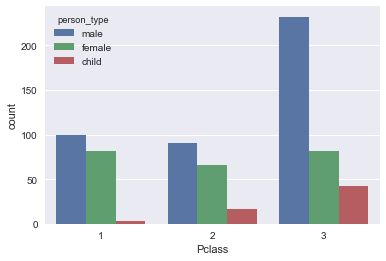

In [23]:
sns.countplot('Pclass',data=train,hue='person_type')

Here we can see that most of the children came from 2nd and 3rd Pclass.

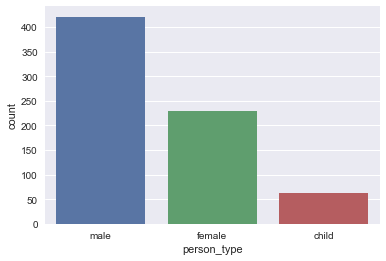

In [24]:
sns.set(style="darkgrid")
ax = sns.countplot(x="person_type", data=train)

Lets see the distribution of genders as per the age groups :

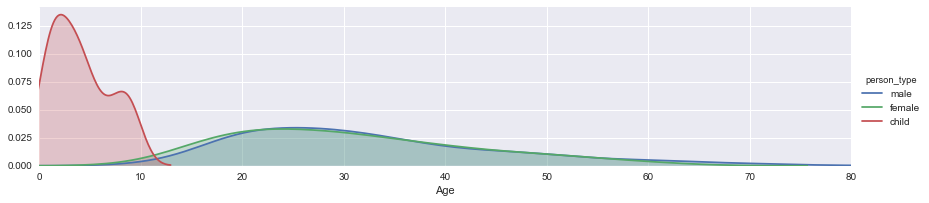

In [25]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(train, hue="person_type",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = train['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

As we can see, the number of male and female passengers belonging to a certain age group is similar and normally distributed.

In [26]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,person_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr.,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master.,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs.,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs.,female
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,Miss.,child


**3) Where did the passengers come from ? **

Embarked column has C,Q,and S values. On Kaggle its said that these stand for Cherbourg, Queenstown, Southhampton

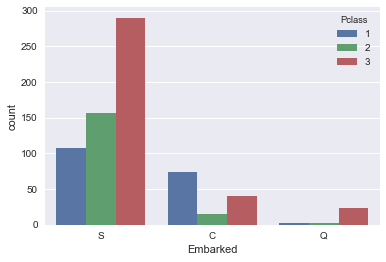

In [27]:
sns.countplot(x="Embarked", hue="Pclass", data=train)

From this graph, we deduce that almost all of the passengers coming from Queenstown were in Pclass 3. This gives us insight about the economic condition of the place.

**4.) Who was alone and who was with family?**

In [28]:
#We will define this by adding a new column which states if a person was alone or with family 
#To get the total number of family members, we'll add the parent/child column with the sibsp column
train['Alone'] =  train.Parch + train.SibSp
test['Alone'] =  test.Parch + test.SibSp

train['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In this new column defined above, if the value is 0 then the person was travelling alone, else he/she had a family. To simplify this for better understanding, we will set everything more than 0 as "With family" else "Alone"

In [29]:
train['Alone'].loc[train['Alone'] >0] = 'With Family'
train['Alone'].loc[train['Alone'] == 0] = 'Alone'

test['Alone'].loc[test['Alone'] >0] = 'With Family'
test['Alone'].loc[test['Alone'] == 0] = 'Alone'

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
train.rename(columns={'Alone':'Family Status'}, inplace=True)
test.rename(columns={'Alone':'Family Status'}, inplace=True)

Since we included the family status for each individual, we no longer need the Sibsp and Parch columns.
Hence we drop those 

In [31]:
train.drop(['SibSp','Parch'], inplace = True, axis = 1)
test.drop(['SibSp','Parch'], inplace = True, axis = 1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,person_type,Family Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr.,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs.,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss.,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs.,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr.,male,Alone


In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,Family Status
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,Mr.,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,Mrs.,With Family
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,Mr.,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,Mr.,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,Mrs.,With Family


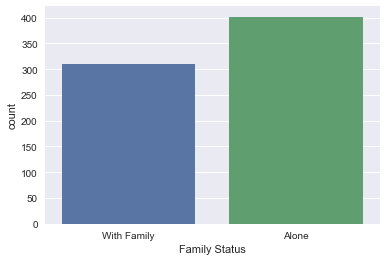

In [34]:
sns.set(style="darkgrid")
sns.countplot(x="Family Status", data=train)

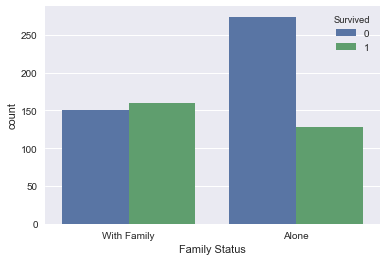

In [35]:
sns.countplot(x="Family Status", hue="Survived", data=train)

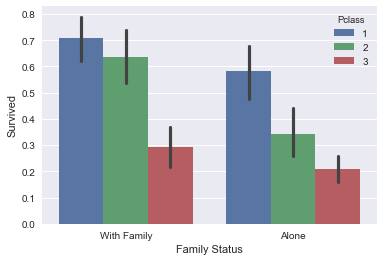

In [36]:
sns.barplot(x="Family Status", y="Survived", hue="Pclass",data=train)

As we can infer, being with family/alone, if a person is in Pclass 3 then the chances of survival are too low

Lets see how if ticket prices (Fare) has any impact on the survival rate of the people

In [37]:
train['Fare_Range']=pd.qcut(train['Fare'],4) #qcut splits or arranges the values according the number of bins we have passed
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 8.05]",0.204188
"(8.05, 15.646]",0.321212
"(15.646, 33.0]",0.486034
"(33.0, 512.329]",0.615819


We can notice that as the fares increase, the survival rate increases.

#### CONVERTING STRING TO NUMERIC

***Since we cannot pass string values into a machine learning model, we convert those into numeric values:***
- For the purpose of regarding sex of the person, we replace male with 0 and female with 1
- The Titles assigned to the names are given as "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5
- Family status as 1 for with family and 0 for alone
- Embarked as 0 - S ,1 - C ,2 - Q
- Regarding fares

In [38]:
train['Sex'].replace(['male','female'],[0,1], inplace = True)
test['Sex'].replace(['male','female'],[0,1], inplace = True)

In [39]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rare', 'Mrs', 'Miss'],
      dtype=object)

In [40]:
train.replace({"Mr.": 1, "Miss.":2,"Miss": 2, "Mrs.":3,"Mrs": 3, "Master.": 4, "Rare": 5}, inplace = True)
test.replace({"Mr.": 1, "Miss.":2,"Miss": 2, "Mrs.":3,"Mrs": 3, "Master.": 4, "Rare": 5}, inplace = True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,person_type,Family Status,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,1,male,With Family,"(-0.001, 8.05]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,3,female,With Family,"(33.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,2,female,Alone,"(-0.001, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,3,female,With Family,"(33.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,1,male,Alone,"(-0.001, 8.05]"


In [41]:
train['Family Status'].replace(['With Family','Alone'],[1,0], inplace = True)
test['Family Status'].replace(['With Family','Alone'],[1,0], inplace = True)

In [42]:
train['Embarked'].replace(['S','C','Q'],[0,1,2], inplace = True)
test['Embarked'].replace(['S','C','Q'],[0,1,2], inplace = True)

In [43]:
train['Fare_category']=0

train.loc[train['Fare']<=7.91,'Fare_category']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_category']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_category']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_category']=3

test['Fare_category']=0
test.loc[test['Fare']<=7.91,'Fare_category']=0
test.loc[(test['Fare']>7.91)&(test['Fare']<=14.454),'Fare_category']=1
test.loc[(test['Fare']>14.454)&(test['Fare']<=31),'Fare_category']=2
test.loc[(test['Fare']>31)&(test['Fare']<=513),'Fare_category']=3



In [44]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4


test['Age_band']=0
test.loc[test['Age']<=16,'Age_band']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_band']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_band']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_band']=3
test.loc[test['Age']>64,'Age_band']=4

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,person_type,Family Status,Fare_Range,Fare_category,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1,male,1,"(-0.001, 8.05]",0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,3,female,1,"(33.0, 512.329]",3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,2,female,0,"(-0.001, 8.05]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,3,female,1,"(33.0, 512.329]",3,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1,male,0,"(-0.001, 8.05]",1,2


In [46]:
train.shape, test.shape

((712, 14), (331, 11))

In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,Family Status,Fare_category,Age_band
0,892,3,"Kelly, Mr. James",0,34.5,7.8292,2,1,0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,0,3,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,2,1,0,1,3
3,895,3,"Wirz, Mr. Albert",0,27.0,8.6625,0,1,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,0,3,1,1,1


Now we remove the unwanted features which are insignificant for our ML model

In [48]:
train.drop(['Name','Age','Fare','Fare_Range','person_type','PassengerId'],axis=1,inplace=True)

In [49]:
test.drop(['Name','Age','Fare'], axis =1, inplace = True)

In [50]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,Family Status,Fare_category,Age_band
0,0,3,0,0,1,1,0,1
1,1,1,1,1,3,1,3,2
2,1,3,1,0,2,0,1,1
3,1,1,1,0,3,1,3,2
4,0,3,0,0,1,0,1,2


In [51]:
test.head()

,PassengerId,Pclass,Sex,Embarked,Title,Family Status,Fare_category,Age_band
0,892,3,0,2,1,0,0,2
1,893,3,1,0,3,1,0,2
2,894,2,0,2,1,0,1,3
3,895,3,0,0,1,0,1,1
4,896,3,1,0,3,1,1,1


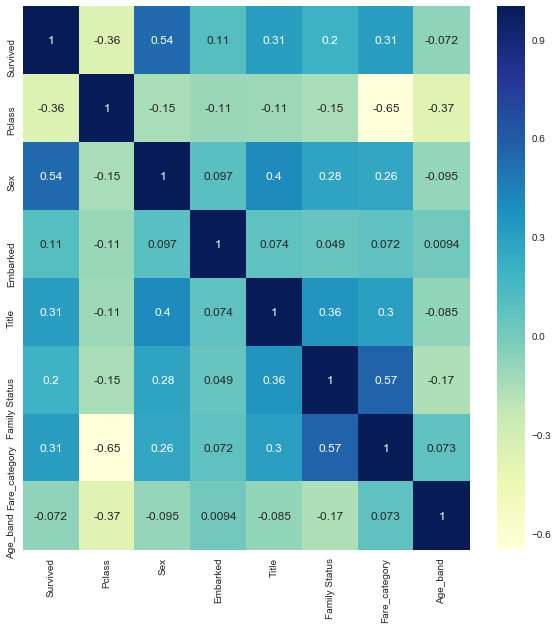

In [52]:
#checking the correlation using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu', ax=ax)
plt.show()

## Predictive Modeling

Since we cannot accurately predict or tell whether a passenger will survive or die, we will do so using some Classification Algorithms.

In [53]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.cross_validation import train_test_split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((712, 7), (712,), (331, 7))

In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
Pclass           331 non-null int64
Sex              331 non-null int64
Embarked         331 non-null int64
Title            331 non-null int64
Family Status    331 non-null int64
Fare_category    331 non-null int64
Age_band         331 non-null int64
dtypes: int64(7)
memory usage: 20.7 KB


### Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution

In [56]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
acc_log = round(logr.score(X_train, y_train) * 100, 2)
print("confidence score generated by the dataset : " ,acc_log)

confidence score generated by the dataset :  79.92


### Support Vector Machines

In [57]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("confidence score generated by the dataset : " ,acc_svc)

confidence score generated by the dataset :  83.01


This model generates a confidence score which is higher than Logistics Regression model

### K-Nearest Neighbour

In [58]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("confidence score generated by the dataset : " ,acc_knn)

confidence score generated by the dataset :  85.25


### Gaussian Naive Bayes

In [59]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("confidence score generated by the dataset : " ,acc_gaussian)

confidence score generated by the dataset :  77.11


### Decision Tree

In [60]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("confidence score generated by the dataset : " ,acc_decision_tree)

confidence score generated by the dataset :  87.36


### Random Forest

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("confidence score generated by the dataset : " ,acc_random_forest)

confidence score generated by the dataset :  87.36


### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. 

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.36
5,Decision Tree,87.36
1,KNN,85.25
0,Support Vector Machines,83.01
2,Logistic Regression,79.92
4,Naive Bayes,77.11


While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [64]:
final = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

In [66]:
final.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


***Hence we have achieved the motive of this project.***